# Training Set Validation
Some errors were noted in the training set, so this notebook will serve to check the note values of the training set.

The new training set was generated by running the newly updated `raw_to_npy.py`, which uses transposition functions from Vectorizer.py that have also been modified.

The new training set is smaller because it is using the "Major Tunes" subset of original songs (this can be changed in `raw_to_npy.py`) however even if only common time songs are used, there is a significant improvement over the old method.

In [1]:
#Consts
PREV_DATA = "Common_Time_Notes"
CURR_DATA = "June_Fixes_Notes"
PLAY_AUDIO = False #if set to true then music21 will be used to play a sample of the dataset on loading
cutoff_percent = 0.01 # Songs will be counted as "out of key" if > this fraction of notes are not in the key (zero allowed)

In [2]:
#Imports
import numpy as np
from matplotlib import pyplot as plt
if PLAY_AUDIO:
    from src.Generation.Decoding import Decoding
prev_tunes = np.load("Data/Vectors/{}.npy".format(PREV_DATA))
print("Imported {} songs from previous set".format(prev_tunes.shape[0]))
print("Imported {} songs from current set".format(curr_tunes.shape[0]))
if PLAY_AUDIO:
    decoder = Decoding.Decoder.from_single_vector(x_train, presentation=False, time='1/32', key="Dmaj")

Imported 6142 songs from previous set
Imported 3468 songs from current set


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Dicts for analysis
note_names_to_num = {
    'c' : 0,
    'c#' : 1,
    'd' : 2,
    'd#' : 3,
    'e' : 4,
    'f' : 5,
    'f#': 6,
    'g' : 7,
    'g#' : 8,
    'a' : 9,
    'a#' : 10,
    'b' : 11,    
}

note_num_to_name = {
    0: 'c',
    1: 'c#',
    2: 'd',
    3: 'd#',
    4: 'e',
    5: 'f',
    6: 'f#',
    7: 'g',
    8: 'g#',
    9: 'a',
    10: 'a#',
    11: 'b',    
}

# Scales
dmaj_notes = [2, 4, 6, 7, 9, 11, 1]
dmyxo_notes = [2, 4, 6, 7, 9, 11, 0]
d_comb = dmaj_notes + dmyxo_notes

def song_in_key(single_tune_notes, key_list, verbose=False):
    in_key = True
    for note in single_tune_notes.flatten()%12:
        if note not in key_list:
            in_key = False
            if verbose:
                print("{}({}) is not in the given key".format(note, note_num_to_name[note]))
    return in_key

def num_notes_out_of_key(single_tune_notes, key_list, verbose=False):
    num_notes = 0
    for note in single_tune_notes.flatten()%12:
        if note not in key_list:
            num_notes += 1
            if verbose:
                print("{}({}) is not in the given key".format(note, note_num_to_name[note]))
    return num_notes

In [4]:
if PLAY_AUDIO:
    rnd = np.random.randint(0, curr_tunes.shape[0])
    print("Selected Tune#: {}".format(rnd))
    sample = x_train[rnd]
    song_in_key(sample, d_comb, verbose=True)
    decoder.play(rnd)

Count songs 'out of key'

In [11]:
def analyze_tunes(tune_vector, key_list, name="Tunes"):
    wrong_note_list = []
    wrong_note_count = 0
    cutoff_n = tune_vector.shape[0] * cutoff_percent
    for n, tune in enumerate(tune_vector):
        wrong_n = num_notes_out_of_key(tune, dmyxo_notes+dmaj_notes)
        wrong_note_list.append(wrong_n)
        if wrong_n > cutoff_n:
            wrong_note_count += 1
    print("{} of {} songs in {} exceeded the cutoff value for wrong notes. {:.2f}%".format(wrong_note_count,tune_vector.shape[0], name, wrong_note_count/tune_vector.shape[0]*100))
    plt.hist(wrong_note_list, range(0,600,10))
    plt.title("{}: Incorrect notes, zero inclusive".format(name))
    plt.show()
    plt.hist(wrong_note_list, range(1,100,1))
    plt.title("{}: Incorrect notes, zero excluded".format(name))
    plt.show()

2437 of 6142 songs in Previous Tunes exceeded the cutoff value for wrong notes. 39.68%


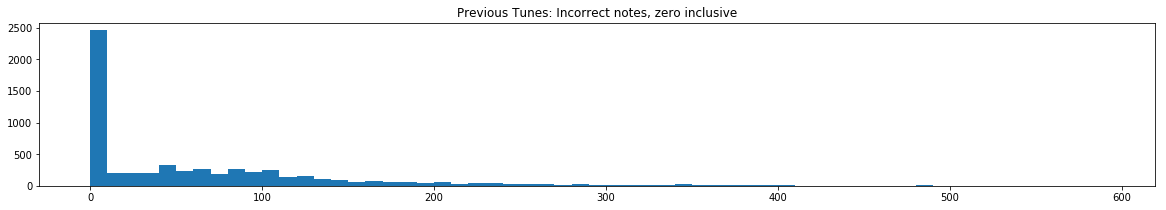

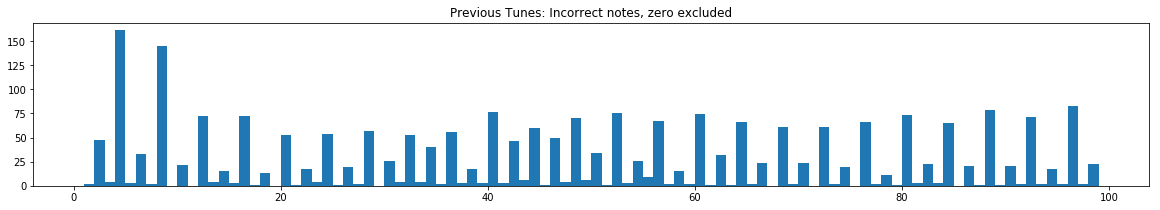

132 of 3468 songs in Current Tunes exceeded the cutoff value for wrong notes. 3.81%


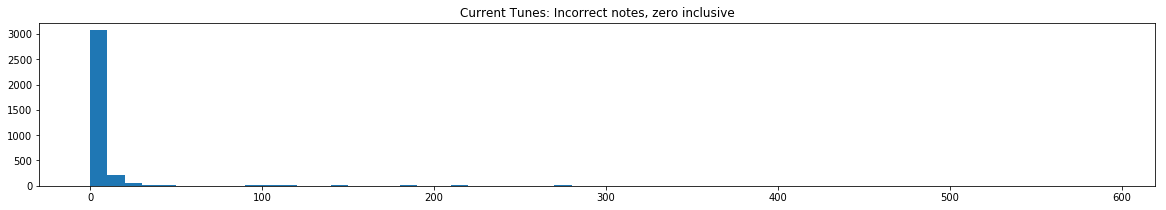

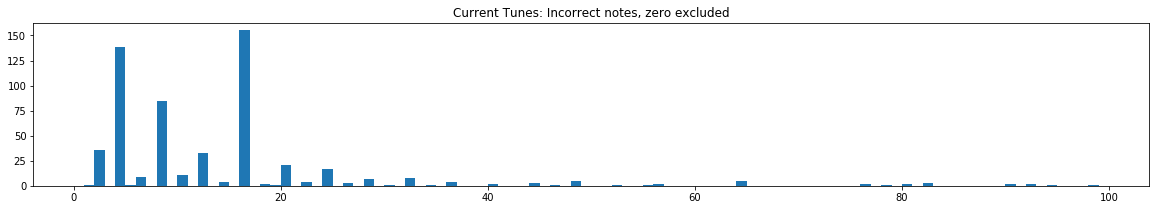

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
analyze_tunes(prev_tunes, d_comb, "Previous Tunes")
analyze_tunes(curr_tunes, d_comb, "Current Tunes")